In [11]:
#RMSE를 최소화시키는 모델 찾기

# 개요
## 1. 선형회귀
####     17종 그냥 변수 + 1007개 상권+45개업종  LR
####    1007개의 상권정보에서 다중공선성을 해결하는데 문제가 생겼다.
####     1007개의 변수를 군집화 해보자
####     1007개 상권 -> 40개의 시군구코드로 대체 LR
####     1007개 상권 -> KMEANS군집화  LR
####     1007개 상권 -> t-sne 군집화 LR

### 모델성능이 별로 안좋았다. -> 비선형회귀모델을 써보자

## B. RandomForest 
####     17종 그냥 변수 + 1007개 상권+45개업종  LGBM
####     1007개 상권 -> 40개의 시군구코드로 대체  LGBM
####     1007개 상권 -> KMEANS군집화   LGBM
####     1007개 상권 -> t-sne 군집화  LGBM
####     1007개 상권 -> autoencoder 군집화  LGBM
## C. LightGBM 
####     17종 그냥 변수 + 1007개 상권+45개업종  RF
####     1007개 상권 -> 40개의 시군구코드로 대체 RF
####     1007개 상권 -> KMEANS군집화  RF
####     1007개 상권 -> t-sne 군집화 RF
####     1007개 상권 -> autoencoder 군집화 RF
## D. Neural Network
####     17종 그냥 변수 + 1007개 상권+45개업종  NN
####     1007개 상권 -> 40개의 시군구코드로 대체 NN
####     1007개 상권 -> KMEANS군집화  NN
####     1007개 상권 -> t-sne 군집화 NN
####     1007개 상권 -> autoencoder 군집화 NN

## E. RMSE가 가장 낮은 모델 -> 설명력이 높다 -> 인사이트 도출

## F. 클러스터링을 통한 골목상권의 인사이트 도출

## 필요한 라이브러리 Import

In [2]:
from sklearn.ensemble import RandomForestRegressor
## kmeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics


## 1. Linear Regression

### 1.1 회귀분석(상권코드)

In [3]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음

# 더미변수화
y=df[['sales_total']]
X= df.iloc[:,4:]
df['district'] = df['district'].astype('object') 
X_dum = pd.get_dummies(df[['district','code']])
# 로버스트 스케일링
rb = RobustScaler()
Xs= pd.DataFrame(rb.fit_transform(X),columns=X.columns)
#최종 X,y
X_final = pd.concat([Xs,X_dum],axis=1)

In [4]:
X

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,16.5,2,2,1748,211158,145498,129.0,188530154.0,3889111.0,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878
1,2.0,1,1,1748,211158,145498,129.0,188530154.0,3889111.0,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290
2,2.0,0,0,1748,211158,145498,129.0,188530154.0,3889111.0,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710
3,6.0,1,1,1748,211158,145498,129.0,188530154.0,3889111.0,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529
4,3.5,2,2,1748,211158,145498,129.0,188530154.0,3889111.0,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000
113261,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000
113262,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000
113263,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000


In [5]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.


model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     66.62
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:15:14   Log-Likelihood:            -2.0276e+06
No. Observations:               90612   AIC:                         4.057e+06
Df Residuals:                   89544   BIC:                         4.067e+06
Df Model:                        1067                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
s_store_no_of_store     

In [15]:
##설명

In [16]:
## 모델링

In [6]:
from sklearn.metrics import r2_score
R2_lr = []
MAE_lr = []
MSE_lr = []
RMSE_lr = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) 


    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(X_train, y_train)

    print(i+1,"번째 시도")

    # 오차 결과값
    y_pred = model.predict(X_test)
    R2_lr.append(r2_score(y_test , y_pred))
    MAE_lr.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_lr.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_lr.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


1 번째 시도
2 번째 시도
3 번째 시도
4 번째 시도
5 번째 시도
6 번째 시도
7 번째 시도
8 번째 시도
9 번째 시도
10 번째 시도


In [7]:
print('R2_lr = ', np.mean(R2_lr))
print('MAE_lr = ', np.mean(MAE_lr))
print('MSE_lr = ', np.mean(MSE_lr))
print('RMSE_lr = ', np.mean(RMSE_lr))

R2_lr =  0.43613018349755617
MAE_lr =  639943709.2999846
MSE_lr =  1.5748691743098286e+18
RMSE_lr =  1254661226.382855


### 1.2 행정구역 + 회귀분석

In [10]:
# 시군구 코드로 데이터 병합
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

#로버스트 스케일링
X= df_merged.iloc[:,2:19]
rb = RobustScaler()
Xs= pd.DataFrame(rb.fit_transform(X),columns=X.columns)
# 더미변수화
df_merged['cgoongoo'] = df_merged['cgoongoo'].astype('object')
X_dum = pd.get_dummies(df_merged[['cgoongoo']])

y=df_merged[['sales_total']]
X_final= pd.concat([Xs,X_dum],axis=1)

In [11]:
X_final

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,...,cgoongoo_11500,cgoongoo_11530,cgoongoo_11545,cgoongoo_11560,cgoongoo_11590,cgoongoo_11620,cgoongoo_11650,cgoongoo_11680,cgoongoo_11710,cgoongoo_11740
0,3.375,2.0,2.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.206492,...,0,0,0,0,0,0,0,0,0,0
1,-0.250,1.0,1.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.059490,...,0,0,0,0,0,0,0,0,0,0
2,-0.250,0.0,0.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,0.920315,...,0,0,0,0,0,0,0,0,0,0
3,0.750,1.0,1.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.573711,...,0,0,0,0,0,0,0,0,0,0
4,0.125,2.0,2.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,0.004533,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,0.500,1.0,0.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,0.051797,...,0,0,0,0,0,0,0,0,0,1
113261,-0.500,0.0,1.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,-0.467788,...,0,0,0,0,0,0,0,0,0,1
113262,-0.500,0.0,0.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,1.243875,...,0,0,0,0,0,0,0,0,0,1
113263,-0.250,0.0,0.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,0.657096,...,0,0,0,0,0,0,0,0,0,1


In [12]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     945.0
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:20:44   Log-Likelihood:            -2.0380e+06
No. Observations:               90612   AIC:                         4.076e+06
Df Residuals:                   90570   BIC:                         4.076e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
s_store_no_of_store     

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_cgoongu = []
MAE_cgoongu = []
MSE_cgoongu = []
RMSE_cgoongu = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) 


    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(X_train, y_train)

    print(i+1,"번째 시도")


    # 오차 결과값
    y_pred = model.predict(X_test)
    R2_cgoongu.append(r2_score(y_test , y_pred))
    MAE_cgoongu.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_cgoongu.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_cgoongu.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


1 번째 시도
2 번째 시도
3 번째 시도
4 번째 시도
5 번째 시도
6 번째 시도
7 번째 시도
8 번째 시도
9 번째 시도
10 번째 시도


In [14]:
print('R2_cgoongu = ',np.mean(R2_cgoongu))
print('MAE_cgoongu = ',np.mean(MAE_cgoongu))
print('MSE_cgoongu = ',np.mean(MSE_cgoongu)) 
print('RMSE_cgoongu = ',np.mean(RMSE_cgoongu))

R2_cgoongu =  0.2945606324306461
MAE_cgoongu =  713794509.5820942
MSE_cgoongu =  2.0429408677508293e+18
RMSE_cgoongu =  1428568807.197817


## 여전히 다중공선성 발생,  모델 더 안좋아짐

### 1.3 KMeans클러스터링 + 회귀분석

#### KMeans 클러스터링

In [15]:
# 새 위치에서 실행 시 데이터 위치 주의
df = pd.read_csv('df_grouped_rate.csv') 
# 불러온 dataframe에서 상권코드, 업종코드 및 연도 제거하기 / 독립 종속 변수 분리하기
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

#### 실루엣 점수와 inertia 실행 소요 시간 확인

In [16]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)

0.5488631251476396

In [17]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
kmeans.inertia_

Wall time: 8.9 s


2.637909549363756e+19

#### Inertia 그려서 '최적 군집 수' 대강의 위치 찾기

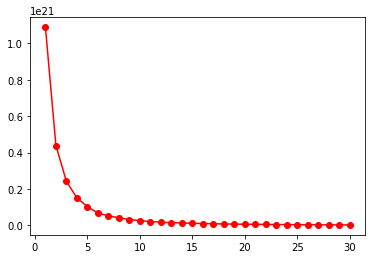

In [18]:
%matplotlib inline
x = []
y = []
for i in range(1, 31):
    x.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    y.append(kmeans.inertia_)
    
plt.plot(x, y, 'ro-')
plt.style.use('default')
plt.show()

#### 군집 수 3으로 결정하고, Kmeans 실행

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
train_labels = kmeans.labels_

In [20]:
lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
X_cl = pd.concat([lb_df, X], axis=1)
X_cl.tail()

,labels,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
113260,0,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.0
113261,0,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.0
113262,0,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.0
113263,0,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.0
113264,0,6.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.976623,0.800000,0.371429,0.000000,0.129870,0.166234,0.703896,0.0


In [21]:
# 군집별 데이터 갯수 확인
X_cl.groupby(by='labels').size()

labels
0    87703
1    23514
2     2048
dtype: int64

#### T-sne로 Clustering 결과 시각화

In [22]:
from sklearn.manifold import TSNE

In [25]:
np.random.seed(1)
matrix = X_cl.iloc[:, 1:].values
tsne_result = TSNE(learning_rate=300, n_components=2, perplexity=40).fit_transform(matrix) ## t-sne로 차원축소

In [24]:
# df_tsne_result=pd.read_csv("df_tsne_result.csv")

FileNotFoundError: [Errno 2] File df_tsne_result.csv does not exist: 'df_tsne_result.csv'

In [26]:
df_tsne_result = (pd.DataFrame(tsne_result, columns=['X', 'Y']).assign(labels = X_cl['labels'], district = df['district'] ))
# t-sne의 처리시간이 오래걸리기에 csv파일로 저장
df_tsne_result.to_csv("df_tsne_result.csv")

In [ ]:
# 군집화된 데이터 2차원에 표현

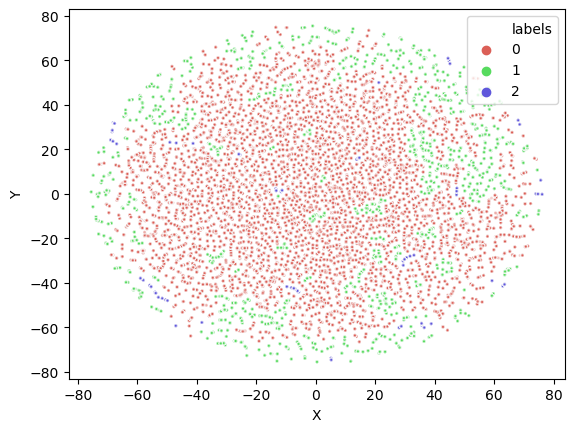

In [27]:
sns.scatterplot(
    x="X", y="Y",
    hue="labels",
    palette=sns.color_palette("hls", 3),
    data=df_tsne_result,
    legend="full",
    alpha=0.3,
    s=5
)

In [ ]:
## 군집화된 데이터 지도에 표시

In [23]:
maps = pd.read_excel('maps.xlsx',encoding='utf-8')
maps.columns=["district","xmap","ymap","C","H"]
# np.unique(maps2['district'])

df_final = pd.merge(df_tsne_result, maps, on=['district'])
df_final.loc[:,'district'] = df_final.district.astype('int64')


In [24]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='labels',
                
                
                palette=sns.color_palette("hls", n_colors=3),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_K", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


#### 군집별 기술통계와 바이올린 플롯으로 데이터 확인

#### 배후지 아파트 평균가격

In [28]:
# # 17개 변수 중 배후지 아파트 평균 가격 - 군집별 기술통계

X_cl[['labels', X_cl.columns[8]]].groupby(by='labels').describe()

b_apt_avg_price                                                        \
                 count          mean           std          min          25%   
labels                                                                         
0              87703.0  1.428734e+08  3.128299e+07   63770174.0  117765666.0   
1              23514.0  2.930017e+08  5.937622e+07  218269259.0  241334304.0   
2               2048.0  6.364709e+08  1.896153e+08  469839952.0  502610750.0   

                                                 
                50%           75%           max  
labels                                           
0       140757018.0  1.641872e+08  2.175934e+08  
1       279079598.0  3.334889e+08  4.626291e+08  
2       561564647.0  6.836920e+08  1.318357e+09

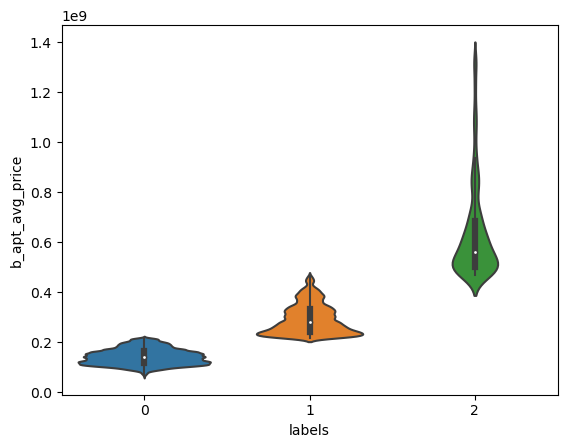

In [29]:
# 17개 변수 중 배후지 아파트 평균 가격 - 군집별 분포
sns.violinplot(x='labels', y=X_cl.columns[8], data=X_cl)
plt.style.use('default')
plt.show()

#### 배후지 월 평균 소득

In [30]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 기술통계
X_cl[['labels', X_cl.columns[9]]].groupby(by='labels').describe()

b_income_avg_monthly_inc                                          \
                          count          mean            std        min   
labels                                                                    
0                       87703.0  3.445343e+06  523879.434196  2213074.0   
1                       23514.0  4.515762e+06  773678.698627  2840931.0   
2                        2048.0  5.390793e+06  682957.447949  3246229.5   

                                                      
              25%        50%          75%        max  
labels                                                
0       3069459.0  3382338.0  3736356.000  6080675.0  
1       3908305.5  4457248.5  5024248.000  7417693.0  
2       5207518.0  5516389.0  5945470.125  6630464.0

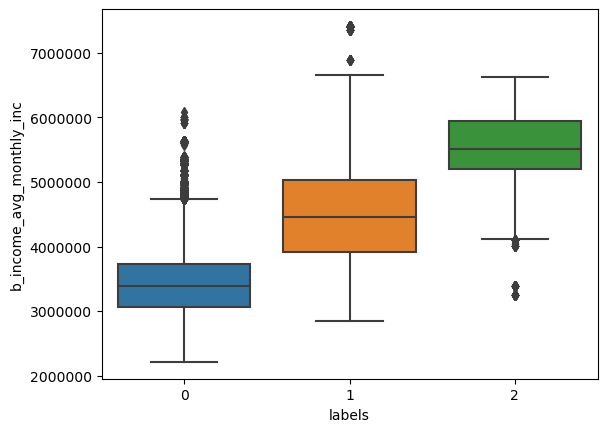

In [31]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 분포
sns.boxplot(x='labels', y=X_cl.columns[9], data=X_cl)
plt.show()

#### 회귀분석

In [32]:
df_k=df.assign(labels = X_cl['labels'])

In [33]:
df_k

,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,...,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24,labels
0,2015,1000001,CS100001,3.263885e+09,16.5,2,2,1748,211158,145498,...,3889111.0,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878,0
1,2015,1000001,CS100002,7.520000e+08,2.0,1,1,1748,211158,145498,...,3889111.0,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290,0
2,2015,1000001,CS100003,1.650000e+08,2.0,0,0,1748,211158,145498,...,3889111.0,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710,0
3,2015,1000001,CS100004,1.164048e+09,6.0,1,1,1748,211158,145498,...,3889111.0,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529,0
4,2015,1000001,CS100005,6.667218e+08,3.5,2,2,1748,211158,145498,...,3889111.0,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2019,1001010,CS300008,1.441360e+08,2.0,0,0,230,164052,179007,...,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000,0
113261,2019,1001010,CS300009,3.067237e+09,2.0,0,0,230,164052,179007,...,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000,0
113262,2019,1001010,CS300011,1.794132e+07,1.0,0,1,230,164052,179007,...,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000,0
113263,2019,1001010,CS300016,8.942270e+06,3.0,0,0,230,164052,179007,...,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000,0


In [34]:
# 더미변수화
X_dum = pd.get_dummies(df_k[['labels','code']])
#스케일링
X= df_k.iloc[:,4:21]
rb = RobustScaler()
Xs= pd.DataFrame(rb.fit_transform(X),columns=X.columns)
#최종 X,y 
y=df_k[['sales_total']]
X_final= pd.concat([Xs, # 위에서 스케일링한 수치형 변수
                    X_dum],axis=1)

In [35]:
X_final

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,...,code_CS300008,code_CS300009,code_CS300010,code_CS300011,code_CS300012,code_CS300013,code_CS300014,code_CS300015,code_CS300016,code_CS300017
0,3.375,2.0,2.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.206492,...,0,0,0,0,0,0,0,0,0,0
1,-0.250,1.0,1.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.059490,...,0,0,0,0,0,0,0,0,0,0
2,-0.250,0.0,0.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,0.920315,...,0,0,0,0,0,0,0,0,0,0
3,0.750,1.0,1.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.573711,...,0,0,0,0,0,0,0,0,0,0
4,0.125,2.0,2.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,0.004533,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,-0.250,0.0,0.0,-0.261187,-0.525317,-0.461129,-0.010417,-0.000176,-0.311203,0.740949,...,1,0,0,0,0,0,0,0,0,0
113261,-0.250,0.0,0.0,-0.261187,-0.525317,-0.461129,-0.010417,-0.000176,-0.311203,1.008499,...,0,1,0,0,0,0,0,0,0,0
113262,-0.500,0.0,1.0,-0.261187,-0.525317,-0.461129,-0.010417,-0.000176,-0.311203,-0.570044,...,0,0,0,1,0,0,0,0,0,0
113263,0.000,0.0,0.0,-0.261187,-0.525317,-0.461129,-0.010417,-0.000176,-0.311203,-0.661662,...,0,0,0,0,0,0,0,0,1,0


In [36]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.


model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     981.4
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:19:54   Log-Likelihood:            -2.0305e+06
No. Observations:               90612   AIC:                         4.061e+06
Df Residuals:                   90548   BIC:                         4.062e+06
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
s_store_no_of_store     

In [37]:
R2_k = []
MAE_k = []
MSE_k = []
RMSE_k = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) 
   
    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(X_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))

    # 오차 결과값
    y_pred = model.predict(X_test)
    R2_k.append(r2_score(y_test , y_pred))
    MAE_k.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_k.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_k.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

1 번째 시도
0.4047830033089541
0.4058413846486886
2 번째 시도
0.4045032986417344
0.4077902642587383
3 번째 시도
0.40253843781086784
0.41594297490523446
4 번째 시도
0.40342335226102854
0.41245578104059993
5 번째 시도
0.4083455274119396
0.39253720257438307
6 번째 시도
0.4209965143294039
0.3474481900720787
7 번째 시도
0.4084106215522739
0.3904919352802323
8 번째 시도
0.40195305881757193
0.416258118373916
9 번째 시도
0.3970195997771322
0.43636791352944393
10 번째 시도
0.405757500091403
0.4020056082012087


In [38]:
print('R2_k = ',np.mean(R2_k) )
print('MAE_k = ',np.mean(MAE_k))
print('MSE_k = ',np.mean(MSE_k) )
print('RMSE_k = ',np.mean(RMSE_k) )

R2_k =  0.4027139372884524
MAE_k =  636716059.6695051
MSE_k =  1.7101624404743662e+18
RMSE_k =  1306291823.4029202


In [39]:
### 1.4 t-sne + 회귀분석

In [40]:
## df에  위에서 돌린tsne결과 병합
df_t=df.assign(
         x_tsne = df_tsne_result['X'],
         y_tsne = df_tsne_result['Y'])


In [41]:
df_t[['x_tsne','y_tsne']]

,x_tsne,y_tsne
0,18.672159,-31.374664
1,18.672159,-31.374664
2,18.672407,-31.374506
3,18.672159,-31.374664
4,18.672159,-31.374664
...,...,...
113260,3.571182,4.071816
113261,3.571182,4.071816
113262,3.571182,4.071816
113263,3.571182,4.071816


In [42]:
y = df_t[['sales_total']]
X = df_t.drop(['year','district','sales_total'], axis=1)

In [43]:
df_t

,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,...,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24,x_tsne,y_tsne
0,2015,1000001,CS100001,3.263885e+09,16.5,2,2,1748,211158,145498,...,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878,18.672159,-31.374664
1,2015,1000001,CS100002,7.520000e+08,2.0,1,1,1748,211158,145498,...,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290,18.672159,-31.374664
2,2015,1000001,CS100003,1.650000e+08,2.0,0,0,1748,211158,145498,...,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710,18.672407,-31.374506
3,2015,1000001,CS100004,1.164048e+09,6.0,1,1,1748,211158,145498,...,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529,18.672159,-31.374664
4,2015,1000001,CS100005,6.667218e+08,3.5,2,2,1748,211158,145498,...,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698,18.672159,-31.374664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2019,1001010,CS300008,1.441360e+08,2.0,0,0,230,164052,179007,...,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000,3.571182,4.071816
113261,2019,1001010,CS300009,3.067237e+09,2.0,0,0,230,164052,179007,...,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000,3.571182,4.071816
113262,2019,1001010,CS300011,1.794132e+07,1.0,0,1,230,164052,179007,...,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000,3.571182,4.071816
113263,2019,1001010,CS300016,8.942270e+06,3.0,0,0,230,164052,179007,...,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000,3.571182,4.071816


In [44]:
df_t.iloc[:,4:21]

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,16.5,2,2,1748,211158,145498,129.0,188530154.0,3889111.0,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878
1,2.0,1,1,1748,211158,145498,129.0,188530154.0,3889111.0,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290
2,2.0,0,0,1748,211158,145498,129.0,188530154.0,3889111.0,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710
3,6.0,1,1,1748,211158,145498,129.0,188530154.0,3889111.0,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529
4,3.5,2,2,1748,211158,145498,129.0,188530154.0,3889111.0,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000
113261,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000
113262,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000
113263,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000


In [45]:
# 더미변수화
X_dum = pd.get_dummies(df_t[['code']])
#스케일링
X= df_t.iloc[:,4:21]
rb = RobustScaler()
Xs= pd.DataFrame(rb.fit_transform(X),columns=X.columns)

#최종 X,y 
y=df_t[['sales_total']]
X_final= pd.concat([Xs, # 위에서 스케일링한 수치형 변수
                    X_dum,df_t[['x_tsne','y_tsne']]],axis=1)

In [46]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.


model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     980.9
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:20:29   Log-Likelihood:            -2.0305e+06
No. Observations:               90612   AIC:                         4.061e+06
Df Residuals:                   90548   BIC:                         4.062e+06
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
s_store_no_of_store     

In [47]:
from sklearn.metrics import r2_score
R2_t = []
MAE_t = []
MSE_t = []
RMSE_t = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.fit_transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_t.append(r2_score(y_test , y_pred))
    MAE_t.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_t.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_t.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


1 번째 시도
2 번째 시도
3 번째 시도
4 번째 시도
5 번째 시도
6 번째 시도
7 번째 시도
8 번째 시도
9 번째 시도
10 번째 시도


In [48]:
print('R2_tsne = ',np.mean(R2_t))
print('MAE_tsne = ',np.mean(MAE_t))
print('MSE_tsne = ',np.mean(MSE_t)) 
print('RMSE_tsne = ',np.mean(RMSE_t))

R2_tsne =  0.40910397400711584
MAE_tsne =  630952075.5029842
MSE_tsne =  1.6511071066122355e+18
RMSE_tsne =  1284454978.3715084


In [70]:
### 결론 : 선형회귀가 아닐것이다 -> 비선형회귀
# RandomForest , Lgbm, Neural Network, cnn

In [71]:
### 2. RandomForest

In [72]:
### RandomForest에 쓸 변수들 : 
### RF는 스케일링을 하지 않는다.

In [112]:
### 1007개지역상권+ 수치형변수 + 45개 업종
y=df[['sales_total']]
X= df.iloc[:,4:]
df['district'] = df['district'].astype('object')
X_dum = pd.get_dummies(df[['district','code']])
X_1007= pd.concat([X,X_dum],axis=1)

### 40가지 시군구+ 수치형변수 + 45개 업종
y1=df_merged[['sales_total']]
X2= df_merged.iloc[:,2:19]
X_dum2 = pd.get_dummies(df_merged[['cgoongoo','code']])
X_c= pd.concat([X2,X_dum2],axis=1)

### KMeans클러스터링 + 수치형변수 + 45개 업종
y2=df_k[['sales_total']]
X_dum3 = pd.get_dummies(df_k[['labels','code']])
X_k= pd.concat([X,X_dum3],axis=1)

### tsne클러스터링 + 수치형변수 + 45개 업종
y3=df_t[['sales_total']]
X_dum4 = pd.get_dummies(df[['code']])
X_t= pd.concat([X,X_dum4,df_t[['x_tsne','y_tsne']]],axis=1)


In [50]:
X_1007

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,...,code_CS300008,code_CS300009,code_CS300010,code_CS300011,code_CS300012,code_CS300013,code_CS300014,code_CS300015,code_CS300016,code_CS300017
0,16.5,2,2,1748,211158,145498,129.0,188530154.0,3889111.0,0.707812,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1,1748,211158,145498,129.0,188530154.0,3889111.0,0.734836,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0,0,1748,211158,145498,129.0,188530154.0,3889111.0,0.914956,...,0,0,0,0,0,0,0,0,0,0
3,6.0,1,1,1748,211158,145498,129.0,188530154.0,3889111.0,0.640305,...,0,0,0,0,0,0,0,0,0,0
4,3.5,2,2,1748,211158,145498,129.0,188530154.0,3889111.0,0.746605,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,...,1,0,0,0,0,0,0,0,0,0
113261,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,...,0,1,0,0,0,0,0,0,0,0
113262,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,...,0,0,0,1,0,0,0,0,0,0
113263,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,...,0,0,0,0,0,0,0,0,1,0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_1007, y, test_size=0.2)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_1007, y, test_size=0.2)
    
    #Random Forest
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model_RF=regr.fit(X_train, y_train)
    y_pred=model_RF.predict(X_test)
    
    print(i+1,"번째 시도")
    print(model_RF.score(X_test, y_test))


    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)

    

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


1 번째 시도
0.7251205175226965


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


2 번째 시도
0.7197528541168317


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


3 번째 시도
0.7105431941559932


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


4 번째 시도
0.6937547095233777


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


5 번째 시도
0.7173870787245965


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


6 번째 시도
0.7349098617394141


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


7 번째 시도
0.6970476089302178


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


8 번째 시도
0.7018253908526328


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


9 번째 시도
0.7368151581004676


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


10 번째 시도
0.7243713471231167


In [52]:
print("R2_RF = ",np.mean(R2_RF))
print("MAE_RF = ",np.mean(MAE_RF)) 
print("MSE_RF = ",np.mean(MSE_RF) )
print("RMSE_RF = ",np.mean(RMSE_RF)) 

R2_RF =  0.7161527720789345
MAE_RF =  441303017.9428841
MSE_RF =  7.870526734859507e+17
RMSE_RF =  886428402.5873744


In [53]:
### 40가지 시군구+ 수치형변수 + 45개 업종 Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_c_RF = []
MAE_c_RF = []
MSE_c_RF = []
RMSE_c_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_c, y1, test_size=0.2)
    
    #Random Forest
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model_c_RF=regr.fit(X_train, y_train)
    y_pred=model_c_RF.predict(X_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_c_RF.append(r2_score(y_test , y_pred))
    MAE_c_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_c_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_c_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)

    

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


1 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


2 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


3 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


4 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


5 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


6 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


7 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


8 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


9 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


10 번째 시도


In [93]:
print("R2_c_RF = ",np.mean(R2_c_RF))
print("MAE_c_RF = ",np.mean(MAE_c_RF)) 
print("MSE_c_RF = ",np.mean(MSE_c_RF) )
print("RMSE_c_RF = ",np.mean(RMSE_c_RF)) 

R2_c_RF =  0.6747948332407676
MAE_c_RF =  450367178.9091506
MSE_c_RF =  9.175904596535364e+17
RMSE_c_RF =  956869111.0905231


In [58]:
### KMeans클러스터링 + 수치형변수 + 45개 업종 Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_k_RF = []
MAE_k_RF = []
MSE_k_RF = []
RMSE_k_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_k, y2, test_size=0.3)
    
    #Random Forest
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model_k_RF=regr.fit(X_train, y_train)
    y_pred=model_k_RF.predict(X_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_k_RF.append(r2_score(y_test , y_pred))
    MAE_k_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_k_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_k_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)

    

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


1 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


2 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


3 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


4 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


5 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


6 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


7 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


8 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


9 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


10 번째 시도


In [60]:
print("R2_k_RF = ",np.mean(R2_k_RF))
print("MAE_k_RF = ",np.mean(MAE_k_RF)) 
print("MSE_k_RF = ",np.mean(MSE_k_RF) )
print("RMSE_k_RF = ",np.mean(RMSE_k_RF)) 

R2_k_RF =  0.6423115285580853
MAE_k_RF =  464661704.79616565
MSE_k_RF =  1.0187037800148421e+18
RMSE_k_RF =  1008466964.0240192


In [61]:
### t-sne클러스터링 + 수치형변수 + 45개 업종 Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_t_RF = []
MAE_t_RF = []
MSE_t_RF = []
RMSE_t_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_t, y3, test_size=0.3)
    
    #Random Forest
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model_t_RF=regr.fit(X_train, y_train)
    y_pred=model_t_RF.predict(X_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_t_RF.append(r2_score(y_test , y_pred))
    MAE_t_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_t_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_t_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)

    

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


1 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


2 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


3 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


4 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


5 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


6 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


7 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


8 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


9 번째 시도


C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


10 번째 시도


In [63]:
print("R2_t_RF = ",np.mean(R2_t_RF))
print("MAE_t_RF = ",np.mean(MAE_t_RF)) 
print("MSE_t_RF = ",np.mean(MSE_t_RF) )
print("RMSE_t_RF = ",np.mean(RMSE_t_RF)) 

R2_t_RF =  0.6468610592713416
MAE_t_RF =  472675757.8555104
MSE_t_RF =  1.0183821593071214e+18
RMSE_t_RF =  1008355750.769064


In [87]:
## 결론 : 비선형 회귀모델에서 1007개 상권 + 업종 + 수치형변수를 돌린거에서 선형회귀보다 좋은 성능을 보였다.
#        하지만 차원을 줄이기 위해 이용한 kmeans, tsne, 시군구통합은 오히려 성능이 떨어졌다. -> 1007개로 나머지 비선형 회귀모형을 돌리겠다.

In [88]:
### 3.Lgbm에 쓸 변수

In [64]:
### 1007개지역상권+ 수치형변수 + 45개 업종
y=df[['sales_total']]
df['district'] = df['district'].astype('object') 
X1= df.iloc[:,4:]
rb = RobustScaler()
Xs1= pd.DataFrame(rb.fit_transform(X1),columns=X1.columns)
X_dum1 = pd.get_dummies(df[['district','code']])
X_scale= pd.concat([Xs1,X_dum1],axis=1)

### 40가지 시군구+ 수치형변수 + 45개 업종
y2=df_merged[['sales_total']]
X2= df_merged.iloc[:,2:19]
rb = RobustScaler()
Xs2= pd.DataFrame(rb.fit_transform(X2),columns=X2.columns)
X_dum2 = pd.get_dummies(df_merged[['cgoongoo','code']])
X_c_scale= pd.concat([Xs2,X_dum2],axis=1)

### KMeans클러스터링 + 수치형변수 + 45개 업종
y3=df_k[['sales_total']]
X3=df_k.iloc[:,4:21]
rb = RobustScaler()
Xs3= pd.DataFrame(rb.fit_transform(X3),columns=X3.columns)
X_dum3 = pd.get_dummies(df_k[['labels','code']])
X_k_scale= pd.concat([Xs3,X_dum3],axis=1)

### tsne클러스터링 + 수치형변수 + 45개 업종
y4=df_t[['sales_total']]
X4=df_t.iloc[:,4:21]
rb = RobustScaler()
Xs4= pd.DataFrame(rb.fit_transform(X4),columns=X4.columns)
X_dum4 = pd.get_dummies(df_t[['code']])
X_t_scale= pd.concat([Xs4,X_dum4,df_t[['x_tsne','y_tsne']]],axis=1)


In [65]:
### 1007개지역상권+ 수치형변수 + 45개 업종

In [67]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [68]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_lgb_gbdt = []
MAE_lgb_gbdt = []
MSE_lgb_gbdt = []
RMSE_lgb_gbdt = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X_scale, y, test_size=0.2)
    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=2000)
#     predict_train = model.predict(train_x)
    y_pred = model.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_lgb_gbdt.append(r2_score(test_y , y_pred))
    MAE_lgb_gbdt.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_lgb_gbdt.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_lgb_gbdt.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


Training until validation scores don't improve for 2000 rounds
[100]	valid_0's l2: 1.07097e+18
[200]	valid_0's l2: 1.09636e+18
[300]	valid_0's l2: 1.10067e+18
[400]	valid_0's l2: 1.12188e+18
[500]	valid_0's l2: 1.13992e+18
[600]	valid_0's l2: 1.15081e+18
[700]	valid_0's l2: 1.1475e+18
[800]	valid_0's l2: 1.15743e+18
[900]	valid_0's l2: 1.159e+18
[1000]	valid_0's l2: 1.16877e+18
Did not meet early stopping. Best iteration is:
[75]	valid_0's l2: 1.04967e+18
1 번째 시도
Training until validation scores don't improve for 2000 rounds
[100]	valid_0's l2: 1.23855e+18
[200]	valid_0's l2: 1.26724e+18
[300]	valid_0's l2: 1.28562e+18
[400]	valid_0's l2: 1.3114e+18
[500]	valid_0's l2: 1.33702e+18
[600]	valid_0's l2: 1.34974e+18
[700]	valid_0's l2: 1.35934e+18
[800]	valid_0's l2: 1.37045e+18
[900]	valid_0's l2: 1.38042e+18
[1000]	valid_0's l2: 1.38907e+18
Did not meet early stopping. Best iteration is:
[74]	valid_0's l2: 1.22605e+18
2 번째 시도
Training until validation scores don't improve for 2000 rounds

In [69]:
print('R2_lgb_gbdt = ', np.mean(R2_lgb_gbdt))
print('MAE_lgb_gbdt = ', np.mean(MAE_lgb_gbdt))
print('MSE_lgb_gbdt = ', np.mean(MSE_lgb_gbdt)) 
print('RMSE_lgb_gbdt = ', np.mean(RMSE_lgb_gbdt))

R2_lgb_gbdt =  0.5763949538803945
MAE_lgb_gbdt =  551730362.1491787
MSE_lgb_gbdt =  1.2058975326332685e+18
RMSE_lgb_gbdt =  1096479099.7422397


In [70]:
### 40가지 시군구+ 수치형변수 + 45개 업종

In [71]:
X_c_scale

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,...,code_CS300008,code_CS300009,code_CS300010,code_CS300011,code_CS300012,code_CS300013,code_CS300014,code_CS300015,code_CS300016,code_CS300017
0,3.375,2.0,2.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.206492,...,0,0,0,0,0,0,0,0,0,0
1,-0.250,1.0,1.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.059490,...,0,0,0,0,0,0,0,0,0,0
2,-0.250,0.0,0.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,0.920315,...,0,0,0,0,0,0,0,0,0,0
3,0.750,1.0,1.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,-0.573711,...,0,0,0,0,0,0,0,0,0,0
4,0.125,2.0,2.0,1.125114,-0.362372,-0.577136,0.739583,0.425377,0.383618,0.004533,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,0.500,1.0,0.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,0.051797,...,0,0,0,0,0,0,0,0,0,0
113261,-0.500,0.0,1.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,-0.467788,...,0,0,0,0,0,0,0,0,0,0
113262,-0.500,0.0,0.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,1.243875,...,0,0,0,0,0,0,0,0,0,0
113263,-0.250,0.0,0.0,-0.268493,-0.825791,-0.789318,0.364583,0.592860,-0.654704,0.657096,...,0,1,0,0,0,0,0,0,0,0


In [72]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_c_lgb_gbdt = []
MAE_c_lgb_gbdt = []
MSE_c_lgb_gbdt = []
RMSE_c_lgb_gbdt = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X_c_scale, y2, test_size=0.2)
    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model_c_lgb_gbdt = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=2000)
#     predict_train = model.predict(train_x)
    y_pred = model_c_lgb_gbdt.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_c_lgb_gbdt.append(r2_score(test_y , y_pred))
    MAE_c_lgb_gbdt.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_c_lgb_gbdt.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_c_lgb_gbdt.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


Training until validation scores don't improve for 2000 rounds
[100]	valid_0's l2: 1.37584e+18
[200]	valid_0's l2: 1.44941e+18
[300]	valid_0's l2: 1.4793e+18
[400]	valid_0's l2: 1.5142e+18
[500]	valid_0's l2: 1.53177e+18
[600]	valid_0's l2: 1.55219e+18
[700]	valid_0's l2: 1.56712e+18
[800]	valid_0's l2: 1.57901e+18
[900]	valid_0's l2: 1.58392e+18
[1000]	valid_0's l2: 1.58961e+18
Did not meet early stopping. Best iteration is:
[47]	valid_0's l2: 1.33345e+18
1 번째 시도
Training until validation scores don't improve for 2000 rounds
[100]	valid_0's l2: 1.51682e+18
[200]	valid_0's l2: 1.5404e+18
[300]	valid_0's l2: 1.55823e+18
[400]	valid_0's l2: 1.58295e+18
[500]	valid_0's l2: 1.61318e+18
[600]	valid_0's l2: 1.63236e+18
[700]	valid_0's l2: 1.63824e+18
[800]	valid_0's l2: 1.64946e+18
[900]	valid_0's l2: 1.65676e+18
[1000]	valid_0's l2: 1.66705e+18
Did not meet early stopping. Best iteration is:
[53]	valid_0's l2: 1.47269e+18
2 번째 시도
Training until validation scores don't improve for 2000 round

In [73]:
print('R2_c_lgb_gbdt = ', np.mean(R2_c_lgb_gbdt))
print('MAE_c_lgb_gbdt = ', np.mean(MAE_c_lgb_gbdt))
print('MSE_c_lgb_gbdt = ', np.mean(MSE_c_lgb_gbdt)) 
print('RMSE_c_lgb_gbdt = ', np.mean(RMSE_c_lgb_gbdt))

R2_c_lgb_gbdt =  0.5533700904266337
MAE_c_lgb_gbdt =  541697507.752836
MSE_c_lgb_gbdt =  1.2958250332233938e+18
RMSE_c_lgb_gbdt =  1137348132.0968041


In [74]:
### KMeans클러스터링 + 수치형변수 + 45개 업종

In [75]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_k_lgb_gbdt = []
MAE_k_lgb_gbdt = []
MSE_k_lgb_gbdt = []
RMSE_k_lgb_gbdt = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X_k_scale, y3, test_size=0.2)
    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model_k_lgb_gbdt = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=2000)
#     predict_train = model.predict(train_x)
    y_pred = model_k_lgb_gbdt.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_k_lgb_gbdt.append(r2_score(test_y , y_pred))
    MAE_k_lgb_gbdt.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_k_lgb_gbdt.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_k_lgb_gbdt.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


Training until validation scores don't improve for 2000 rounds
[100]	valid_0's l2: 1.3166e+18
[200]	valid_0's l2: 1.36528e+18
[300]	valid_0's l2: 1.40721e+18
[400]	valid_0's l2: 1.44473e+18
[500]	valid_0's l2: 1.47529e+18
[600]	valid_0's l2: 1.49475e+18
[700]	valid_0's l2: 1.50632e+18
[800]	valid_0's l2: 1.51912e+18
[900]	valid_0's l2: 1.53624e+18
[1000]	valid_0's l2: 1.54763e+18
Did not meet early stopping. Best iteration is:
[74]	valid_0's l2: 1.29798e+18
1 번째 시도
Training until validation scores don't improve for 2000 rounds
[100]	valid_0's l2: 1.31894e+18
[200]	valid_0's l2: 1.36265e+18
[300]	valid_0's l2: 1.41091e+18
[400]	valid_0's l2: 1.44521e+18
[500]	valid_0's l2: 1.46859e+18
[600]	valid_0's l2: 1.47942e+18
[700]	valid_0's l2: 1.49063e+18
[800]	valid_0's l2: 1.50463e+18
[900]	valid_0's l2: 1.50908e+18
[1000]	valid_0's l2: 1.51969e+18
Did not meet early stopping. Best iteration is:
[17]	valid_0's l2: 1.26223e+18
2 번째 시도
Training until validation scores don't improve for 2000 rou

In [76]:
print('R2_k_lgb_gbdt = ', np.mean(R2_k_lgb_gbdt))
print('MAE_k_lgb_gbdt = ', np.mean(MAE_k_lgb_gbdt))
print('MSE_k_lgb_gbdt = ', np.mean(MSE_k_lgb_gbdt)) 
print('RMSE_k_lgb_gbdt = ', np.mean(RMSE_k_lgb_gbdt))

R2_k_lgb_gbdt =  0.55332766065226
MAE_k_lgb_gbdt =  541035368.4240012
MSE_k_lgb_gbdt =  1.2491817999511242e+18
RMSE_k_lgb_gbdt =  1117237058.3126836


In [77]:
### tsne클러스터링 + 수치형변수 + 45개 업종

In [78]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_t_lgb_gbdt = []
MAE_t_lgb_gbdt = []
MSE_t_lgb_gbdt = []
RMSE_t_lgb_gbdt = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X_t_scale, y4, test_size=0.2)
    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model_t_lgb_gbdt = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=2000)
#     predict_train = model.predict(train_x)
    y_pred = model_t_lgb_gbdt.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_t_lgb_gbdt.append(r2_score(test_y , y_pred))
    MAE_t_lgb_gbdt.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_t_lgb_gbdt.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_t_lgb_gbdt.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


Training until validation scores don't improve for 800 rounds
[100]	valid_0's l2: 1.41193e+18
[200]	valid_0's l2: 1.47624e+18
[300]	valid_0's l2: 1.53603e+18
[400]	valid_0's l2: 1.57524e+18
[500]	valid_0's l2: 1.60441e+18
[600]	valid_0's l2: 1.63073e+18
[700]	valid_0's l2: 1.64964e+18
[800]	valid_0's l2: 1.66212e+18
Early stopping, best iteration is:
[9]	valid_0's l2: 1.33696e+18
1 번째 시도
Training until validation scores don't improve for 800 rounds
[100]	valid_0's l2: 1.364e+18
[200]	valid_0's l2: 1.42685e+18
[300]	valid_0's l2: 1.49008e+18
[400]	valid_0's l2: 1.5371e+18
[500]	valid_0's l2: 1.56576e+18
[600]	valid_0's l2: 1.5976e+18
[700]	valid_0's l2: 1.61405e+18
[800]	valid_0's l2: 1.63826e+18
Early stopping, best iteration is:
[23]	valid_0's l2: 1.26992e+18
2 번째 시도
Training until validation scores don't improve for 800 rounds
[100]	valid_0's l2: 1.42147e+18
[200]	valid_0's l2: 1.48253e+18
[300]	valid_0's l2: 1.54415e+18
[400]	valid_0's l2: 1.58771e+18
[500]	valid_0's l2: 1.60744e+18

In [79]:
print('R2_t_lgb_gbdt = ', np.mean(R2_t_lgb_gbdt))
print('MAE_t_lgb_gbdt = ', np.mean(MAE_t_lgb_gbdt))
print('MSE_t_lgb_gbdt = ', np.mean(MSE_t_lgb_gbdt)) 
print('RMSE_t_lgb_gbdt = ', np.mean(RMSE_t_lgb_gbdt))

R2_t_lgb_gbdt =  0.5650265833461653
MAE_t_lgb_gbdt =  536879086.3352412
MSE_t_lgb_gbdt =  1.2641511692246884e+18
RMSE_t_lgb_gbdt =  1123931962.946011


In [ ]:
### 3.1 Neural Network(상권코드)

In [80]:
from keras.models import Sequential                  # 신경망 모델링
from keras.layers import Dense
from keras.layers import ELU
from keras.layers import Dropout
from sklearn import metrics
from keras.callbacks import EarlyStopping

In [83]:
model_NN = Sequential()
model_NN.add(Dense(128,input_dim=1069, activation='relu'))
model_NN.add(Dense(256, activation='relu'))
model_NN.add(Dense(512, activation='relu'))
model_NN.add(Dense(123, activation='relu'))
model_NN.add(Dense(64, activation='relu'))
model_NN.add(Dense(1))
model_NN.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [156]:
# atv = ELU(alpha=1.0)
# model_NN = Sequential()
# model_NN.add(Dense(units=128, activation=atv, input_dim=1024))

# model_NN.add(Dense(units=256, activation='tanh'))
# model_NN.add(Dense(units=64, activation='tanh'))

# model_NN.add(Dense(units=1, activation='sigmoid'))
# model_NN.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [84]:
R2_NN = []
MAE_NN = []
MSE_NN = []
RMSE_NN = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X_scale, y, test_size=0.2)
    model_NN.fit(train_x, train_y)
    y_pred = model_NN.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_NN.append(r2_score(test_y , y_pred))
    MAE_NN.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_NN.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_NN.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


2832/2832 [==============================] - 15s 5ms/step - loss: 1967460334306328576.0000 - mae: 640537856.0000
1 번째 시도
2832/2832 [==============================] - 14s 5ms/step - loss: 1588581134319484928.0000 - mae: 561867392.0000
2 번째 시도
2832/2832 [==============================] - 14s 5ms/step - loss: 1532169453305856000.0000 - mae: 540108544.0000
3 번째 시도
2832/2832 [==============================] - 14s 5ms/step - loss: 1481605112567693312.0000 - mae: 526179136.0000
4 번째 시도
2832/2832 [==============================] - 16s 6ms/step - loss: 1398368921249120256.0000 - mae: 517313664.0000
5 번째 시도
2832/2832 [==============================] - 16s 6ms/step - loss: 1386165854009294848.0000 - mae: 515004448.0000
6 번째 시도
2832/2832 [==============================] - 20s 7ms/step - loss: 1319298092293423104.0000 - mae: 506203680.0000
7 번째 시도
2832/2832 [==============================] - 16s 6ms/step - loss: 1289690580619624448.0000 - mae: 502006784.0000
8 번째 시도
2832/2832 [=====================

In [85]:
print('R2_NN = ', np.mean(R2_NN))
print('MAE_NN = ', np.mean(MAE_NN))
print('MSE_NN = ', np.mean(MSE_NN)) 
print('RMSE_NN = ', np.mean(RMSE_NN))

R2_NN =  0.5228438357249108
MAE_NN =  516062836.3903632
MSE_NN =  1.3823986088831242e+18
RMSE_NN =  1171274410.3866396


In [ ]:
from keras.layers.convolutional import *

In [115]:
X.shape

(113265, 1024, 1)

In [327]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# define dataset
X = np.array(X_scale)
y = np.array(y)
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print("X.shape[0]",X.shape[0]) #X.shape[0] 4
print(" X.shape[1]", X.shape[1])#X.shape[1] 3
print("X.shape", X.shape)  #X.shape (4, 3, 1)
print("Y.shape", y.shape) #Y.shape (4,)
 
# define model
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=16, kernel_size=2, activation='tanh', input_shape=(1069, 1)))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv1D(filters=16, kernel_size=2, activation='tanh'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv1D(filters=16, kernel_size=2, activation='tanh'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv1D(filters=16, kernel_size=2, activation='tanh'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
model_CNN.add(Dense(512, activation='tanh'))
model_CNN.add(Dense(256, activation='tanh'))
model_CNN.add(Dense(1,activation='sigmoid'))
model_CNN.summary()
model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
 
 



X.shape[0] 113265
 X.shape[1] 1069
X.shape (113265, 1069, 1)
Y.shape (113265, 1)
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 1068, 16)          48        
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 534, 16)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 534, 16)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 533, 16)           528       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 266, 16)           0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 266, 16)           0         
______________________________________

In [328]:
test_x.shape

(22653, 1069)

In [329]:
R2_CNN = []
MAE_CNN = []
MSE_CNN = []
RMSE_CNN = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
    model_CNN.fit(train_x, train_y)
    y_pred = model_CNN.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_CNN.append(r2_score(test_y , y_pred))
    MAE_CNN.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_CNN.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_CNN.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


2832/2832 [==============================] - 62s 22ms/step - loss: -284354150400.0000 - mse: 3410840925134389248.0000
1 번째 시도
2832/2832 [==============================] - 61s 22ms/step - loss: -821989408768.0000 - mse: 3431149729533132800.0000
2 번째 시도
2832/2832 [==============================] - 61s 21ms/step - loss: -1362061426688.0000 - mse: 3453352442710720512.0000
3 번째 시도
2832/2832 [==============================] - 63s 22ms/step - loss: -1909507620864.0000 - mse: 3501725456774725632.0000
4 번째 시도
2832/2832 [==============================] - 64s 23ms/step - loss: -2437030346752.0000 - mse: 3448649556600815616.0000
5 번째 시도
2832/2832 [==============================] - 64s 23ms/step - loss: -2974845763584.0000 - mse: 3399809524972912640.0000
6 번째 시도
2832/2832 [==============================] - 63s 22ms/step - loss: -3517279109120.0000 - mse: 3490126983491223552.0000
7 번째 시도
2832/2832 [==============================] - 63s 22ms/step - loss: -4063737151488.0000 - mse: 3467783257947373568

In [330]:
print('R2_CNN = ', np.mean(R2_CNN))
print('MAE_CNN = ', np.mean(MAE_CNN))
print('MSE_CNN = ', np.mean(MSE_CNN)) 
print('RMSE_CNN = ', np.mean(RMSE_CNN))

R2_CNN =  -0.21913449400438173
MAE_CNN =  789380817.5868937
MSE_CNN =  3.4711791125547597e+18
RMSE_CNN =  1862727973.0098557


In [ ]:
### 최적 모델 설정

In [ ]:
# import eli5 from eli5.sklearn import PermutationImportance 
# perm = PermutationImportance(model, scoring = "f1", random_state = 42).fit(X_val, y_val) 
# eli5.show_weight(perm, top = 80, feature_names = X_val.columns.tolist())


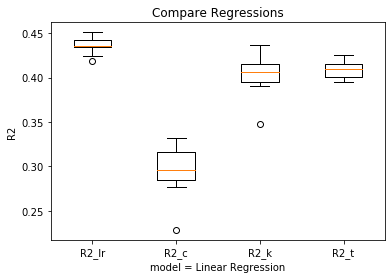

In [95]:
%matplotlib inline
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
     R2_lr,
     R2_cgoongu,
     R2_k,
     R2_t,

     
        
     ]
    ,labels=[
     'R2_lr',
     'R2_c',
     'R2_k',
     'R2_t',

    

 ]
    
    )

axes1.set_xlabel('model = Linear Regression') 
axes1.set_ylabel('R_Squared') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions_LR.png', transparent=True) #png파일로 저장

plt.show()

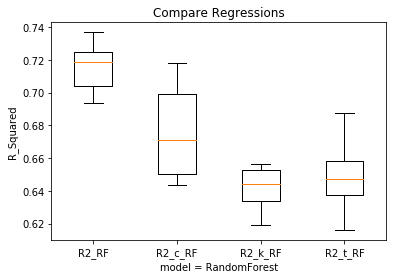

In [97]:
%matplotlib inline
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
     R2_RF,
     R2_c_RF,
     R2_k_RF,
     R2_t_RF,
     
     
        
     ]
    ,labels=[

     'R2_RF',
     'R2_c_RF',
     'R2_k_RF',
     'R2_t_RF',
     
    

 ]
    
    )


axes1.set_xlabel('model = RandomForest') 
axes1.set_ylabel('R_Squared') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions_RF.png', transparent=True) #png파일로 저장

plt.show()

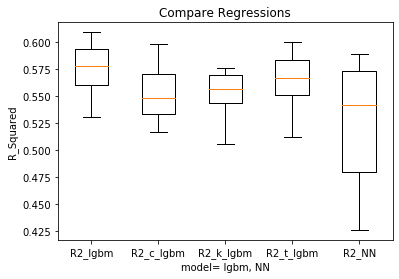

In [98]:
%matplotlib inline
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [

     R2_lgb_gbdt,
     R2_c_lgb_gbdt,
     R2_k_lgb_gbdt,
     R2_t_lgb_gbdt,
     R2_NN,
     
     
        
     ]
    ,labels=[

     'R2_lgbm',
     'R2_c_lgbm',
     'R2_k_lgbm',
     'R2_t_lgbm',
     'R2_NN',
    

 ]
    
    )


axes1.set_xlabel('model= lgbm, NN') 
axes1.set_ylabel('R_Squared') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions_lgbm.png', transparent=True) #png파일로 저장

plt.show()

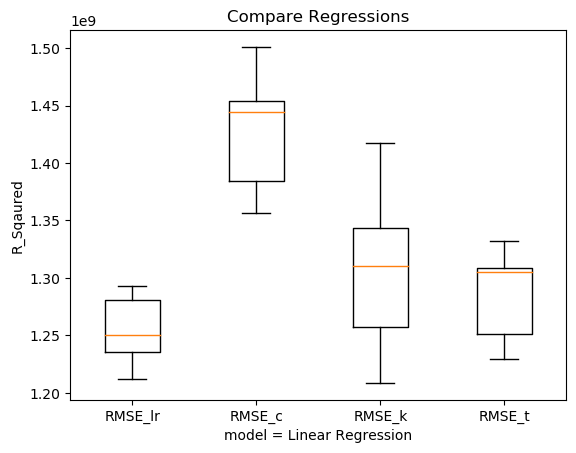

In [109]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
     RMSE_lr,
     RMSE_cgoongu,
     RMSE_k,
     RMSE_t,
    
     
        
     ]
    ,labels=[
     'RMSE_lr',
     'RMSE_c',
     'RMSE_k',
     'RMSE_t',
     

 ]
    
    )


axes1.set_xlabel('model = Linear Regression') 
axes1.set_ylabel('R_Sqaured') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions_rmse_LR.png', transparent=True) #png파일로 저장

plt.show()

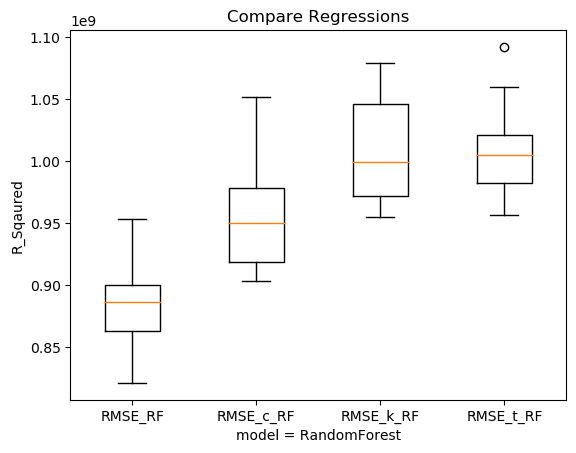

In [110]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [

     RMSE_RF,
     RMSE_c_RF,
     RMSE_k_RF,
     RMSE_t_RF,

     
        
     ]
    ,labels=[

     'RMSE_RF',
     'RMSE_c_RF',
     'RMSE_k_RF',
     'RMSE_t_RF',


 ]
    
    )


axes1.set_xlabel('model = RandomForest') 
axes1.set_ylabel('R_Sqaured') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions_rmse_RF.png', transparent=True) #png파일로 저장

plt.show()

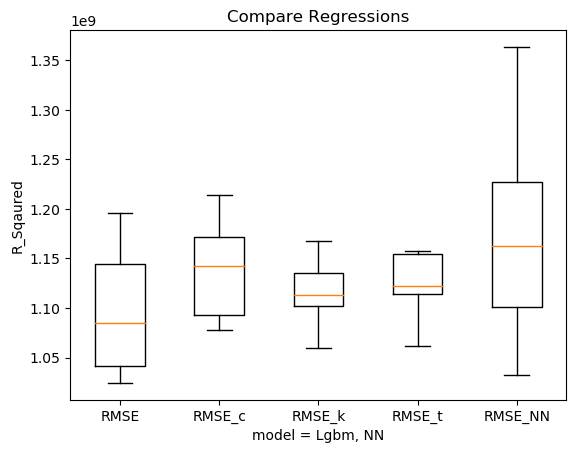

In [111]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [

     RMSE_lgb_gbdt,
     RMSE_c_lgb_gbdt,
     RMSE_k_lgb_gbdt,
     RMSE_t_lgb_gbdt,
     RMSE_NN,
    
     
        
     ]
    ,labels=[

     'RMSE',
     'RMSE_c',
     'RMSE_k',
     'RMSE_t',
     'RMSE_NN',
    

 ]
    
    )


axes1.set_xlabel('model = Lgbm, NN') 
axes1.set_ylabel('R_Sqaured') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions_rmse_lgbm.png', transparent=True) #png파일로 저장

plt.show()

In [ ]:
###인사이트 도출

In [115]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [119]:
import eli5 
from eli5.sklearn import PermutationImportance 
perm = PermutationImportance(model_RF, random_state = 42).fit(X_test, y_test) 
# eli5.show_weight(perm, top = 80, feature_names = X_val.columns.tolist())
print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = X_test.columns.tolist())))

KeyboardInterrupt: 

In [125]:
a= model_RF.feature_importances_

In [130]:
h= pd.Series(a, index=X_test.columns)

In [135]:
h.sort_values(ascending=False)[:10]

s_store_no_of_store         0.347222
sales_female                0.059914
code_CS300002               0.036440
b_income_avg_monthly_inc    0.026685
code_CS300001               0.026651
sales_21_24                 0.025698
s_work_female               0.024377
s_float_male                0.023051
b_apt_avg_price             0.022455
sales_17_21                 0.021775
dtype: float64

In [ ]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
###앞으로의 방향